In [2]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from copy import deepcopy as copy
from typing import List, Tuple
import sys
# Add measurement mcts python package to path
sys.path.append('../src/measurement_mcts')
from measurement_mcts.state_evaluation.reinforcement_learning import MCTSRLWrapper, plot_state_image, get_image_based_state
from measurement_mcts.environment.measurement_control_env import MeasurementControlEnvironment
from measurement_mcts.utils.utils import rotate_about_point
from measurement_mcts.environment.exploration_grid import ExplorationGrid

### Create Game Environment and RL Wrapper (This initializes NN at random)

In [2]:
# Create the environment and RL wrapper (This initiailizes a new random nerual network)
env = MeasurementControlEnvironment()
rl = MCTSRLWrapper(env, 'new', env.N, width_pixels=30, width_meters=50)

Toy Measurement Control Initialized
Using device: cuda
Model loaded


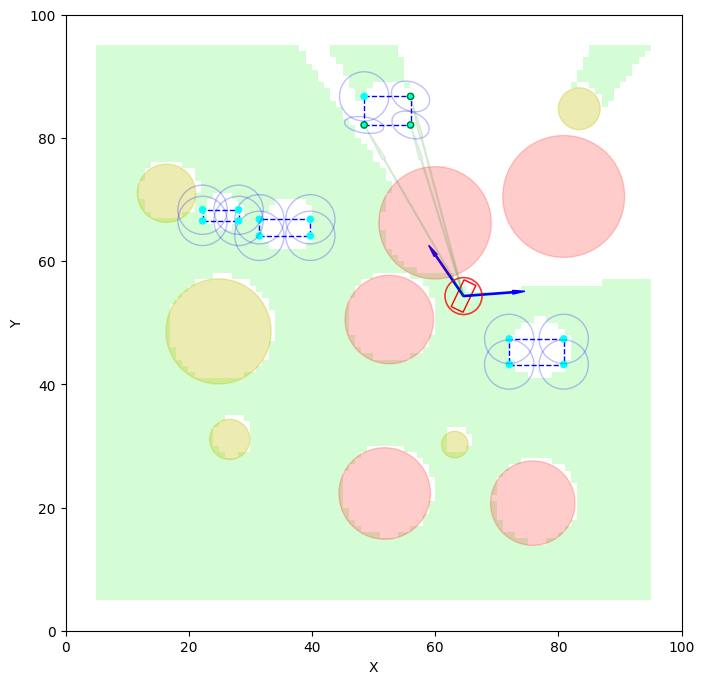

In [10]:
# Generate a random starting state and draw the grid and state
starting_state = env.reset()
env.draw_state(env.get_state())

In [4]:
a = np.array([True, False, True])
np.where(a)

(array([0, 2]),)

start time environment: 0.0009  
start time image state: 0.009

In [5]:
state = starting_state
state[0][2] = 5. # Set starting velocity if wanted

env.draw_state(state, explore_grid=True)
nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=env.explore_grid.grid, grid_origin=env.explore_grid.grid_origin, meters_per_pixel=env.explore_grid.meters_per_pixel)
plot_state_image(nn_image_state, 'Nural Network Image State')

for _ in range(5):
    start_time = timeit.default_timer()
    state, reward, done = env.step(state, [1., -1.])
    print("Time for environment step:", timeit.default_timer() - start_time)
    env.draw_state(state, explore_grid=True)
    start_time = timeit.default_timer()
    nn_car_state, nn_image_state = get_image_based_state(env, state, width_pixels=35, 
        width_meters=60, explore_grid=env.explore_grid.grid, grid_origin=env.explore_grid.grid_origin, meters_per_pixel=env.explore_grid.meters_per_pixel)
    print("Time for image state generation:", timeit.default_timer() - start_time)
    plot_state_image(nn_image_state, 'Nural Network Image State')

TypeError: MeasurementControlEnvironment.draw_state() got an unexpected keyword argument 'explore_grid'